<a href="https://colab.research.google.com/github/greatex98/Getting-started/blob/main/lab3_4_trucks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# collect / import  Data

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/hyunsushin/Downloads/lab3_4_trucks.csv')

# Check the data structure of the dataset
print(df.info())

# Look at the first 5 rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   list_price  23 non-null     float64
 1   best_price  23 non-null     float64
dtypes: float64(2)
memory usage: 500.0 bytes
None
   list_price  best_price
0        12.4        11.2
1        14.3        12.5
2        14.5        12.7
3        14.9        13.1
4        16.1        14.1


# Discover and Visualize Data

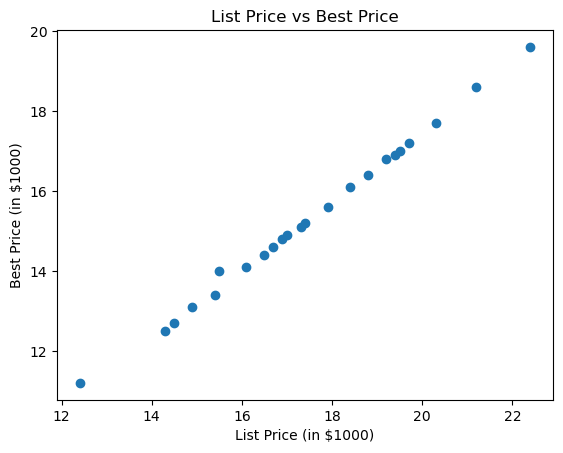

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship
plt.scatter(df['list_price'], df['best_price'])
plt.xlabel('List Price (in $1000)')
plt.ylabel('Best Price (in $1000)')
plt.title('List Price vs Best Price')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['list_price']]
y = df['best_price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Linear Regression
y_pred_linear = linear_model.predict(X_test)


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


# Randdom Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# random Forest Regression
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)


# Explore diffrent models / performance metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Evaluate Decision Tree
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Evaluate Random Forest
mae_forest = mean_absolute_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Linear Regression: MAE = {mae_linear}, R2 = {r2_linear}")
print(f"Decision Tree: MAE = {mae_tree}, R2 = {r2_tree}")
print(f"Random Forest: MAE = {mae_forest}, R2 = {r2_forest}")


Linear Regression: MAE = 0.07698839174805627, R2 = 0.9945398318743364
Decision Tree: MAE = 0.45999984799999966, R2 = 0.8657944505087228
Random Forest: MAE = 0.4507997541400027, R2 = 0.8379197739621312


# Prediction when list price is $15000

In [ ]:
# Predict the best price when the list price is $15,000
list_price_input = 15000

# Reshape the input to match the expected format for the model (2D array)
list_price_input_reshaped = [[list_price_input]]

# Use the linear regression model to predict the best price
predicted_best_price = linear_model.predict(list_price_input_reshaped)

print(f"Predicted best price for a list price of ${list_price_input}: ${predicted_best_price[0]:.2f}")
